In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel("C:/DataSet/Data_Train.xlsx")

In [4]:
# Выведите первые несколько строк датасета, чтобы понять его структуру
print(data.head())

       Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1    05:50         13:15   7h 25m     2 stops         No info   7662  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882  
3    18:05         23:30   5h 25m      1 stop         No info   6218  
4    16:50         21:35   4h 45m      1 stop         No info  13302  


In [5]:
# Получите информацию о датасете, включая типы данных и наличие пропущенных значений
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB
None


In [6]:
# Посмотрите статистические характеристики числовых переменных
print(data.describe())

              Price
count  10683.000000
mean    9087.064121
std     4611.359167
min     1759.000000
25%     5277.000000
50%     8372.000000
75%    12373.000000
max    79512.000000


In [13]:
# Отбираем только нужные колонки
data = data[['Total_Stops', 'Duration', 'Price']]

In [16]:
# Заменяем "non-stop" на 0 в колонке Total_Stops
data['Total_Stops'] = data['Total_Stops'].str.replace('non-stop', '0')

In [18]:
# Изменяем данные в колонке Total_Stops
data['Total_Stops'] = data['Total_Stops'].str.replace(' stops', '').str.replace(' stop', '').fillna(0).astype(int)

In [21]:
# Изменяем данные в колонке Duration
#data['Duration'] = data['Duration'].str.split(' ')
#data['Duration'] = data['Duration'].apply(lambda x: int(x[0][:-1])*60 + int(x[1][:-1]) if len(x) > 1 else int(x[0][:-1])*60)

In [20]:
# Проверяем результат
print(data.head())
print(data.info())

   Total_Stops  Duration  Price
0            0       170   3897
1            2       445   7662
2            2      1140  13882
3            1       325   6218
4            1       285  13302
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Total_Stops  10683 non-null  int32
 1   Duration     10683 non-null  int64
 2   Price        10683 non-null  int64
dtypes: int32(1), int64(2)
memory usage: 208.8 KB
None


In [23]:
# Разделим данные на признаки (X) и целевую переменную (y)
X = data[['Total_Stops', 'Duration']]
y = data['Price']

# Разделим данные на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создадим и обучим модель
model = LinearRegression()
model.fit(X_train, y_train)

# Сделаем предсказания на тестовом наборе
y_pred = model.predict(X_test)

# Оценим качество модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 13744444.445347669
R^2 Score: 0.350573308935218


Коэффициенты регрессии:
Total_Stops: 3491.998531949609
Duration: 1.209885372130347

Уравнение регрессии:
Price = 5426.07511789144 + (3491.998531949609 * Total_Stops) + (1.209885372130347 * Duration)

Корреляция Пирсона:
Total_Stops:
  Total_Stops: 1.0
  Duration: 0.7354138988309226
Duration:
  Total_Stops: 0.7354138988309227
  Duration: 1.0


C:\Users\idemo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


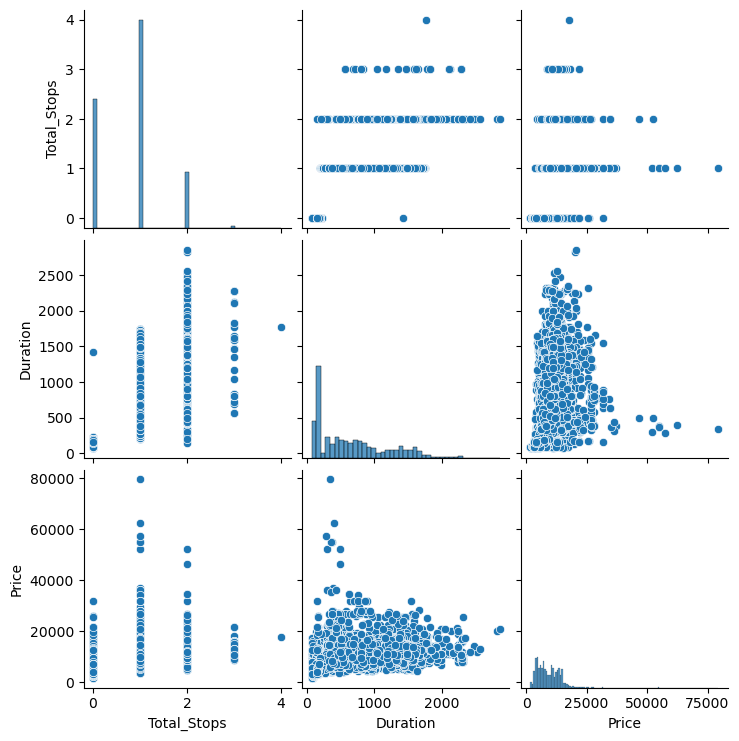

In [25]:
# Коэффициенты регрессии
coefficients = model.coef_

# Коэффициент сдвига (intercept)
intercept = model.intercept_

# Корреляция Пирсона для каждого признака
correlation_coefficients = np.corrcoef(X_train, rowvar=False)

# Вывод коэффициентов регрессии
print("Коэффициенты регрессии:")
for i, feature in enumerate(X.columns):
    print(f"{feature}: {coefficients[i]}")

# Вывод уравнения регрессии
print("\nУравнение регрессии:")
equation = f"Price = {intercept} + "
for i, feature in enumerate(X.columns):
    equation += f"({coefficients[i]} * {feature}) + "
equation = equation[:-3]  # Убираем последний плюс и пробел
print(equation)

# Вывод корреляции Пирсона
print("\nКорреляция Пирсона:")
for i, feature in enumerate(X.columns):
    print(f"{feature}:")
    for j, other_feature in enumerate(X.columns):
        print(f"  {other_feature}: {correlation_coefficients[i, j]}")

# График
sns.pairplot(data)
plt.show()